## Import relevant libraries 

In [5]:
import warnings
warnings.filterwarnings("ignore")
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

## Apply CNN Model with 3 layers without image augmentation

In [6]:
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator 
# Reference: https://stackoverflow.com/questions/53037510/can-flow-from-directory-get-train-and-validation-data-from-the-same-directory-in
# generate batches of tensor image data with real-time data augmentation

datagen = ImageDataGenerator(validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "/content/OCT2017 /train",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    subset = "training")

validation_generator = datagen.flow_from_directory(
    "/content/OCT2017 /train",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    subset = "validation")

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [7]:
tf.keras.backend.clear_session()

In [ ]:
# Reference: https://keras.io/api/layers/convolution_layers/convolution2d/
# Reference: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Reference: https://keras.io/api/layers/pooling_layers/max_pooling2d/
# Reference: https://keras.io/api/layers/regularization_layers/dropout/
# Reference: https://keras.io/api/layers/pooling_layers/global_average_pooling2d/
# Reference: https://keras.io/api/layers/core_layers/dense/

# Model 1

input_shape = (224,224,3)

# Input Layer
Input_Layer = Input(shape=(input_shape))

# Convolutional Layer
First_Conv2D = Conv2D(32, kernel_size = (3, 3), activation="relu",padding = 'same')(Input_Layer)
# Batch Normalization
First_BatchNormalization = BatchNormalization()(First_Conv2D)

# Convolutional Layer
Second_Conv2D = Conv2D(64, kernel_size = (3, 3), activation="relu",padding = 'same')(First_BatchNormalization)
# Batch Normalization
Second_BatchNormalization = BatchNormalization()(Second_Conv2D)

# MaxPool Layer
maxpool = MaxPooling2D(pool_size=(2,2))(Second_BatchNormalization)
# Dropout Layer
dropout = Dropout(rate=0.2)(maxpool)

# Convolutional Layer
Third_Conv2D = Conv2D(64, kernel_size = (3, 3), activation="relu",padding = 'same')(dropout)
# Batch Normalization
Third_BatchNormalization = BatchNormalization()(Third_Conv2D)

# GlobalAveragePooling Layer
global_average_pool = GlobalAveragePooling2D()(Third_BatchNormalization)

# Dense Layer
Output_Layer = Dense(4, activation="softmax")(global_average_pool)

# Creating a model
model1 = Model(inputs=Input_Layer,outputs=Output_Layer)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0     

In [ ]:
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1)

# Creating model1_without_augmentation_save folder before running the code.
filepath="model1_without_augmentation_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')

# Callbacks
optimizer = tf.keras.optimizers.Adam()
model1.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

# Creating a list with all the callbacks we want
callback_list = [earlystop, checkpoint]

train_samples = 66788
validation_samples = 16696
batch_size = 128
model1.fit(train_generator, validation_data= validation_generator, steps_per_epoch=train_samples//batch_size, callbacks=callback_list, epochs=50)

Epoch 1/50
521/521 [==============================] - ETA: 0s - loss: 0.7812 - accuracy: 0.7107
Epoch 1: val_accuracy improved from -inf to 0.73437, saving model to model1_without_augmentation_save/weights-01-0.7344.hdf5
521/521 [==============================] - 415s 765ms/step - loss: 0.7812 - accuracy: 0.7107 - val_loss: 0.6906 - val_accuracy: 0.7344
Epoch 2/50
521/521 [==============================] - ETA: 0s - loss: 0.5411 - accuracy: 0.8030
Epoch 2: val_accuracy did not improve from 0.73437
521/521 [==============================] - 361s 693ms/step - loss: 0.5411 - accuracy: 0.8030 - val_loss: 0.7335 - val_accuracy: 0.7133
Epoch 3/50
521/521 [==============================] - ETA: 0s - loss: 0.4148 - accuracy: 0.8522
Epoch 3: val_accuracy improved from 0.73437 to 0.77611, saving model to model1_without_augmentation_save/weights-03-0.7761.hdf5
521/521 [==============================] - 361s 691ms/step - loss: 0.4148 - accuracy: 0.8522 - val_loss: 0.5863 - val_accuracy: 0.7761
Epo

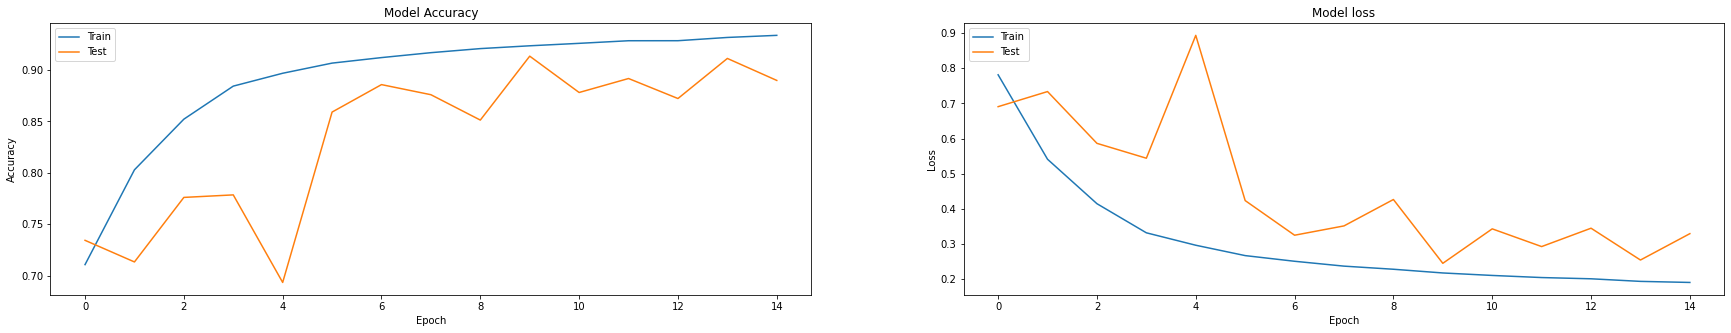

In [ ]:
# Plot training & validation acc values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
# Accuracy on test dataset

test_generator = datagen.flow_from_directory(
    "/content/OCT2017 /test",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    shuffle = False)
test_samples = 968
batch_size = 128

result = model1.evaluate(test_generator, steps = test_samples // batch_size+1, verbose = 1)
print("Accuracy on Test Dataset:{0}, Loss on Test Dataset: {1}".format(result[1]*100,result[0]))

Found 968 images belonging to 4 classes.
8/8 [==============================] - 4s 530ms/step - loss: 0.2915 - accuracy: 0.8833
Accuracy on Test Dataset:88.32644820213318, Loss on Test Dataset: 0.2914683222770691


Found 968 images belonging to 4 classes.


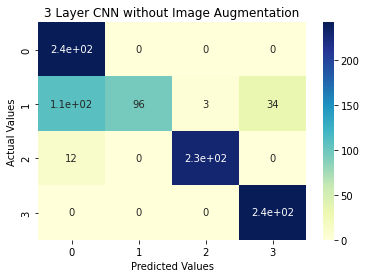

In [ ]:
# Plot Confusion Matrix

# predicted values
y_pred = model1.predict(test_generator, test_samples // batch_size+1)
predicted_values = np.argmax(y_pred, axis=1)

confusionmatrix = confusion_matrix(test_generator.classes,predicted_values)
plt.title("3 Layer CNN without Image Augmentation")
sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Observations**

We are getting an accuracy of 0.88 on the test dataset using simple 3 Layers CNN model without Image Augmentation.

## Apply CNN Model with 3 Layers with Image Augmentation

In [12]:
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator 
# Reference: https://stackoverflow.com/questions/53037510/can-flow-from-directory-get-train-and-validation-data-from-the-same-directory-in
# Reference: https://www.w3schools.com/python/ref_func_next.asp

# generate batches of tensor image data with real-time data augmentation

datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = datagen.flow_from_directory(
    "/content/OCT2017 /train",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    subset="training")

validation_generator = datagen.flow_from_directory(
    "/content/OCT2017 /train",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    subset="validation")

Found 66788 images belonging to 4 classes.
Found 16696 images belonging to 4 classes.


In [13]:
tf.keras.backend.clear_session()

In [ ]:
# Reference: https://keras.io/api/layers/convolution_layers/convolution2d/
# Reference: https://keras.io/api/layers/normalization_layers/batch_normalization/
# Reference: https://keras.io/api/layers/pooling_layers/max_pooling2d/
# Reference: https://keras.io/api/layers/regularization_layers/dropout/
# Reference: https://keras.io/api/layers/pooling_layers/global_average_pooling2d/
# Reference: https://keras.io/api/layers/core_layers/dense/


input_shape = (224,224,3)

# Input Layer
Input_Layer = Input(shape=(input_shape))

# Convolutional Layer
First_Conv2D = Conv2D(32, kernel_size = (3, 3), activation="relu",padding = 'same')(Input_Layer)
# Batch Normalization
First_BatchNormalization = BatchNormalization()(First_Conv2D)

# Convolutional Layer
Second_Conv2D = Conv2D(64, kernel_size = (3, 3), activation="relu",padding = 'same')(First_BatchNormalization)
# Batch Normalization
Second_BatchNormalization = BatchNormalization()(Second_Conv2D)

# MaxPool Layer
maxpool = MaxPooling2D(pool_size=(2,2))(Second_BatchNormalization)
# Dropout Layer
dropout = Dropout(rate=0.2)(maxpool)

# Convolutional Layer
Third_Conv2D = Conv2D(64, kernel_size = (3, 3), activation="relu",padding = 'same')(dropout)
# Batch Normalization
Third_BatchNormalization = BatchNormalization()(Third_Conv2D)

# GlobalAveragePooling Layer
global_average_pool = GlobalAveragePooling2D()(Third_BatchNormalization)

# Dense Layer
Output_Layer = Dense(4, activation="softmax")(global_average_pool)

# Creating a model
model1 = Model(inputs=Input_Layer,outputs=Output_Layer)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0     

In [ ]:
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1)

# Creating model1_with_augmentation_save folder before running the code.
filepath="model1_with_augmentation_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')

# Callbacks
optimizer = tf.keras.optimizers.Adam()
model1.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

# Creating a list with all the callbacks we want
callback_list = [earlystop, checkpoint]

train_samples = 66788
validation_samples = 16696
batch_size = 128
model1.fit(train_generator, validation_data= validation_generator, steps_per_epoch=train_samples//batch_size, callbacks=callback_list, epochs=50)

Epoch 1/50
521/521 [==============================] - ETA: 0s - loss: 0.8559 - accuracy: 0.6777
Epoch 1: val_accuracy improved from -inf to 0.44568, saving model to model1_with_augmentation_save/weights-01-0.4457.hdf5
521/521 [==============================] - 980s 2s/step - loss: 0.8559 - accuracy: 0.6777 - val_loss: 4.2352 - val_accuracy: 0.4457
Epoch 2/50
521/521 [==============================] - ETA: 0s - loss: 0.6007 - accuracy: 0.7821
Epoch 2: val_accuracy improved from 0.44568 to 0.56594, saving model to model1_with_augmentation_save/weights-02-0.5659.hdf5
521/521 [==============================] - 965s 2s/step - loss: 0.6007 - accuracy: 0.7821 - val_loss: 1.1848 - val_accuracy: 0.5659
Epoch 3/50
521/521 [==============================] - ETA: 0s - loss: 0.4538 - accuracy: 0.8413
Epoch 3: val_accuracy improved from 0.56594 to 0.61530, saving model to model1_with_augmentation_save/weights-03-0.6153.hdf5
521/521 [==============================] - 965s 2s/step - loss: 0.4538 - acc

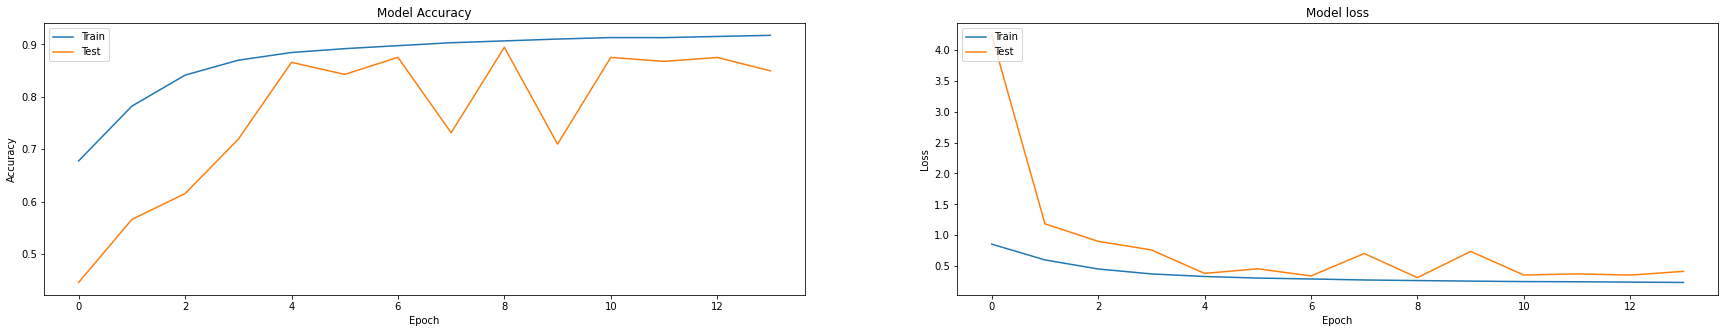

In [ ]:
# Plot training & validation acc values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [14]:
# Accuracy on test dataset

test_generator = datagen.flow_from_directory(
    "/content/OCT2017 /test",
    target_size = (224, 224),
    batch_size=128,
    class_mode = "categorical",
    shuffle = False)
test_samples = 968
batch_size = 128

result = model1.evaluate(test_generator, steps = test_samples // batch_size+1, verbose = 1)
print("Accuracy on Test Dataset:{0}, Loss on Test Dataset: {1}".format(result[1]*100,result[0]))

Found 968 images belonging to 4 classes.
8/8 [==============================] - 12s 1s/step - loss: 0.1821 - accuracy: 0.9442
Accuracy on Test Dataset:94.42148804664612, Loss on Test Dataset: 0.18214717507362366


Found 968 images belonging to 4 classes.


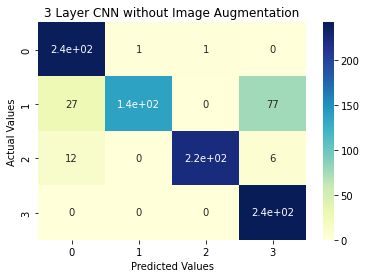

In [ ]:
# Plot Confusion Matrix

# predicted values
y_pred = model1.predict(test_generator, test_samples // batch_size+1)
predicted_values = np.argmax(y_pred, axis=1)

confusionmatrix = confusion_matrix(test_generator.classes,predicted_values)
plt.title("3 Layer CNN without Image Augmentation")
sns.heatmap(confusionmatrix, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Observations**

We are getting an accuracy of 0.94 on the test dataset using simple 3 Layers CNN Model with Image Augmentation.

### Observations:
1. We are splitting the training dataset into training and validation dataset such that 80% of the images belong to training dataset and 20% of the images belong to validation dataset.
2. We're using ImageDataGenerator class to rescale pixel values from 0-255 to the preferred range of 0-1.
3. We have applied a simple 3 Layers CNN Model with and without Image Augmentation on the dataset. Without image augmentation we are getting an accuracy of 0.88 on the test dataset and with image augmentation we are getting an accuracy of 0.94 on the test dataset.
4. We can observe from the accuracy and loss graph that in case of 3 Layers CNN model without image augmentation our model is somewhat overfitting. On the other hand, in case of 3 Layers CNN model with image augmentation our model is performing perfectly well.
5. We can also observe that in case of 3 Layers CNN model with image augmentation we are getting much better results as compared to 3 Layers CNN model without image augmentation.

### Takeways:
1. Image augmentation is a critical aspect of this Kaggle problem.
2. Next we can start applying more complex models and try to achieve much higher accuracy.